# Keras Sequential API

## Classify images of clothing

In this notebook, we will train a neural network to classify images of clothing from the Fashion MNIST dataset. The notebook is based on the public tutorial found here: https://www.tensorflow.org/tutorials/keras/classification

##### Import the required modules

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

##### Download the Fashion MNIST Dataset
We will use the `keras.datasets` package, which contains utility functions to download popular datasets with a few lines of code, without worrying about whether you are downloading from the correct source, or the correct version, etc.

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

The downloaded data will be stored on your disk in a hidden folder (e.g. `/Users/<username>/.keras/datasets/fashion-mnist` on MacOs. 

The variables `train_images` and `test_images` are numpy arrays of shape $(n_{images}, 28, 28)$, whereas `train_labels`, and `test_labels` are numpy arrays of size $(n_{images}, )$

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(train_labels[:10])

(60000, 28, 28)
(60000,)
[9 0 0 3 0 2 7 2 5 5]


Each label is an integer in 0..9. Let us define the corresponding class names (they are not defined in the dataset)

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Finally, let us plot the first training image as an example.

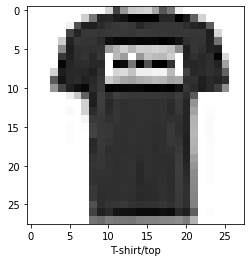

In [5]:
plt.figure()
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[1]])
plt.grid(False)
plt.show()

##### Let us build our first Keras model, with the Sequential API

For this example, we will use a simple two-layer, fully-connected neural network. 

The network includes two types layer (sublcasses of `keras.layers.Layer`):

- `Dense` layers (i.e. fully connected ones) take as mandatory parameters the number of output units. Optional parameters include the activation function, the presence of bias, etc.
- `Flatten` layers are used to flatten a rank-N tensor (2 in this case) to a 1D array. Their input parameter is the shape of the input tensor.

The `Flatten` layer is needed to feed the following `Dense` layers, which only accept (batches of) rank-1 tensors.

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', name='first_dense'),
    keras.layers.Dense(10, activation='softmax', name='second_dense')
])

Let us show a summary of the model and plot it. Notice that the `Flatten` layer does not have trainable parameters. Also notice the `?`/`None` dimensions in the various layers. These mean that the layer can accept any value for that dimension (the batch size in this case).

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
first_dense (Dense)          (None, 128)               100480    
_________________________________________________________________
second_dense (Dense)         (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
keras.utils.plot_model(model, 'tmp_new.png', show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


##### Compile the model

Let us now compile the model, specifying optimizer, loss function and metrics.

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

##### Train the model

Let us now train the model. Remember that `np.ndarray` are automatically converted to TF tensors, so we don't need to do that explicitly when passing data to `fit()`

In [11]:
model.fit(train_images, train_labels, batch_size=32, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 2s 1ms/step - loss: 3.3332 - accuracy: 0.6787
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7045 - accuracy: 0.7290
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6101 - accuracy: 0.7697
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5873 - accuracy: 0.7835
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5625 - accuracy: 0.7920
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5472 - accuracy: 0.7997
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5317 - accuracy: 0.8120: 0s
Epoch 8/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4964 - accuracy: 0.8328
Epoch 9/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4830 - accuracy: 0.8380
Epoch 10/100
1875/1875 [==============================] - 2s 1ms/step

KeyboardInterrupt: 

##### Evaluate on unseen data

Let us test the model on unseen data using the `evaluate()` method.

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.7889999747276306


##### Perform a prediction on a single image

Let us run a prediction on one image and see the result.

Predicted label: 7 (Sneaker)
Real label: 7 (Sneaker)


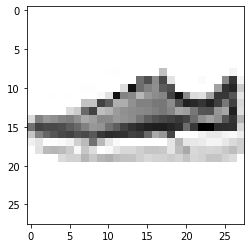

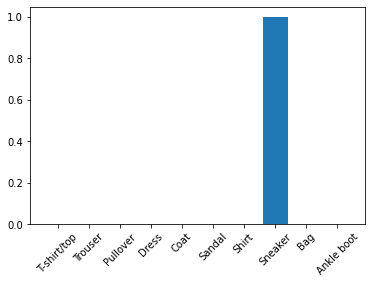

In [23]:
idx = 9

pred = model.predict(test_images[idx].reshape(1, 28, 28))
pred_lidx = tf.argmax(pred[0])
pred_label = class_names[pred_lidx]

print("Predicted label: {} ({})".format(pred_lidx, pred_label))
print("Real label: {} ({})".format(test_labels[idx], class_names[test_labels[idx]]))

plt.figure()
plt.imshow(test_images[idx], cmap=plt.cm.binary)
plt.grid(False)
plt.figure()
plt.bar(range(len(class_names)), pred[0], tick_label=class_names)
plt.xticks(rotation=45)
plt.show()